# 算法原理

PCA是一种无监督的数据降维方法，LDA是一种有监督的数据降维方法。我们知道即使在训练样本上，我们提供了类别标签，在使用PCA模型的时候，我们是不利用类别标签的，而LDA在进行数据降维的时候是利用数据的类别标签提供的信息的。

从几何的角度来看，PCA和LDA都是将数据投影到新的相互正交的坐标轴上。只不过在投影的过程中他们使用的约束是不同的，也可以说目标是不同的。

LDA的思想：“投影后类内方差最小，类间方差最大”。即数据在低维度上进行投影，投影后希望每一种类别数据的投影点尽可能的接近，而不同类别的数据的类别中心之间的距离尽可能的大。

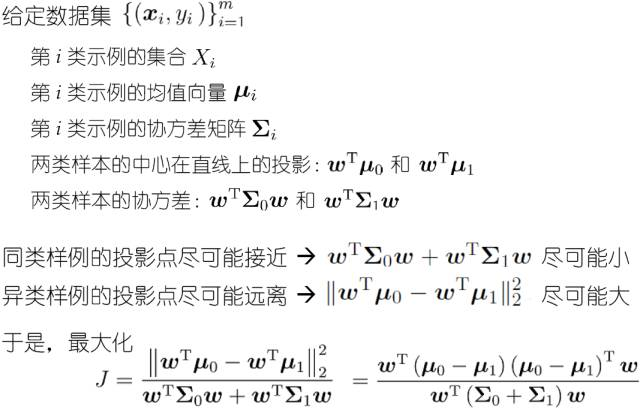
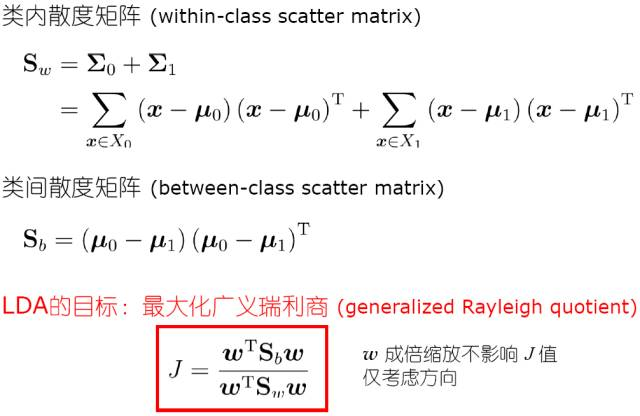
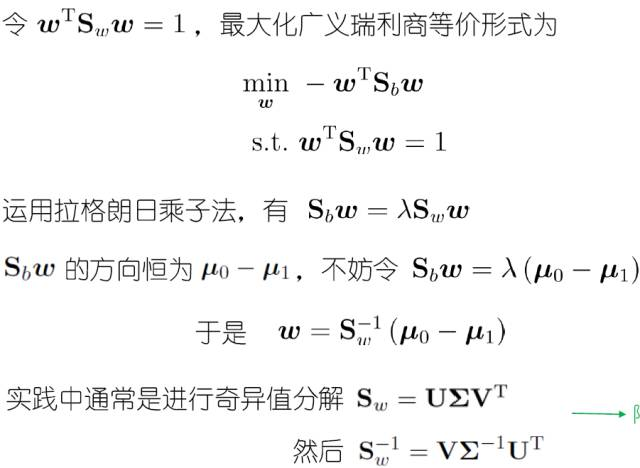
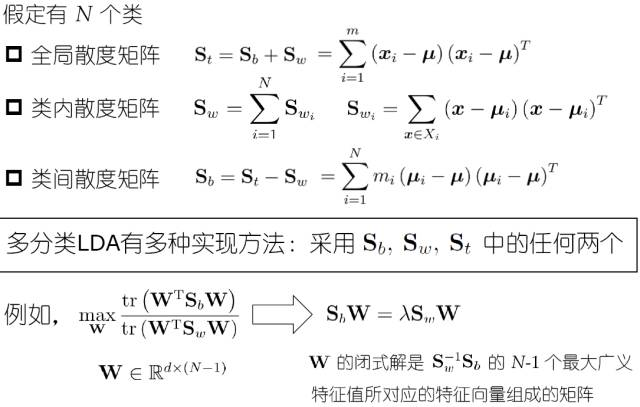

LDA与PCA异同

相同点：

- 两者均可以对数据进行降维。

- 两者在降维时均使用了矩阵特征分解的思想。

- 两者都假设数据符合高斯分布。

不同点：

- LDA是有监督的降维方法，而PCA是无监督的降维方法

- LDA降维最多降到类别数-1的维数，而PCA没有这个限制。

- LDA除了可以用于降维，还可以用于分类。

- LDA选择分类性能最好的投影方向，而PCA选择样本点投影具有最大方差的方向。

# 数据准备

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

In [2]:
#读取数据
data = pd.read_csv("../data/breast_cancer.csv")
print(data.head())

       0      1       2       3        4        5       6        7       8  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

         9  ...     21      22      23      24      25      26      27  \
0  0.07871  ...  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  label  
0  0.4601  0.11890      0  
1  0.2750  0.08902      0  
2 

In [3]:
#准备数据
data = data.dropna()
y = data['label']
x = data.drop(['label'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

# 模型训练

In [12]:
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

# 模型保存

In [13]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../test/best_models/lda.pkl')

# 加载模型
model = joblib.load('../test/best_models/lda.pkl')

In [14]:
# 法二
import pickle

with open('../test/best_models/lda.pkl', 'wb') as f:
    pickle.dump(model, f)
 
#读取Model
with open('../test/best_models/lda.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [15]:
# 转换数据
x_new = model.transform(x_train)

In [16]:
x_new.shape

(426, 1)

# 模型应用

In [26]:
# 先对数据降维，再进行分类
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
x_new = lda.transform(x_train)

# 分类模型
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [2, 3, 4]}

#GridSearchCV优化参数、训练模型
gsearch = GridSearchCV(knn, param_grid)
knn = gsearch.fit(x_new, y_train)

#打印最优结果
print('KNN params:', knn.best_estimator_)

KNN params: KNeighborsClassifier(n_neighbors=4)


In [27]:
# 测试集降维并预测
x_new = lda.transform(x_test)
prediction = knn.predict(x_new)

In [28]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 0.958041958041958


In [29]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        54
           1       0.99      0.94      0.97        89

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

